### 데이터 불러오기 

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import json 
from bs4 import BeautifulSoup 

# 한글 형태소 분석기 konlpy 
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran, Twitter 

# 영문 텍스트마이닝 ntlk 
from nltk.corpus import stopwords 

# 케라스 sequence model, tokenizer 로딩 
from tensorflow.python.keras.preprocessing.sequence import pad_sequences 
from tensorflow.python.keras.preprocessing.text import Tokenizer


import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor


# 데이터 불러오기 
train_df = pd.read_csv("news_train.csv")
test_df = pd.read_csv("news_test.csv")

### DATA SHAPE 

In [36]:
# 데이터 shape 살펴보기 
print(f"train_df: {train_df.shape}") # 약 11만개 
print(f"test_df{test_df.shape}") # 약 14만개 

train_df: (118745, 6)
test_df(142565, 6)


### 결측치 확인 

In [37]:
# 결측치 확인 
print(train_df.isna().any())
print(" ")
print(test_df.isna().any())

# 결측치는 존재하지 않음을 확인 

n_id       False
date       False
title      False
content    False
ord        False
info       False
dtype: bool
 
n_id       False
date       False
title      False
content    False
ord        False
id         False
dtype: bool


In [38]:
# 빈칸 확인 
train_df.replace("", float("NaN"), inplace=True)
print(train_df.isnull().values.any())

test_df.replace("", float("NaN"), inplace=True)
test_df.isnull().values.any()

False


False

In [39]:
# # 특수문자 제거 
# train_df['content'] = train_df['content'].apply(lambda x: re.sub("[^ ㄱ-ㅣ가-힣]+", " ",  x))
# test_df['content'] = test_df['content'].apply(lambda x: re.sub("[^ ㄱ-ㅣ가-힣]+", " ",  x))

In [40]:
# # 특수문자 제거 확인 
# train_df["content"]

### 컨텐츠 길이분포 확인

In [41]:
# 콘텐츠(아티클) 길이 확인 
train_len_df = train_df["content"].apply(len)
train_len_df.head()

0    42
1    37
2    33
3    32
4    20
Name: content, dtype: int64

In [42]:
# 테스트셋 아티클 길이 
test_len_df = test_df["content"].apply(len)
test_len_df.head()

0     48
1     76
2     56
3     76
4    102
Name: content, dtype: int64

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


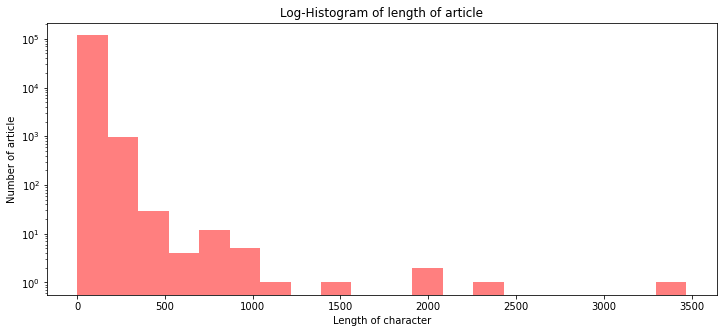

In [43]:
# 길이 분포 

# 히스토그램 
plt.figure(figsize = (12, 5))
plt.hist(train_len_df, bins = 20, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목 
plt.title('Log-Histogram of length of article')
plt.xlabel('Length of character')
plt.ylabel('Number of article')

plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


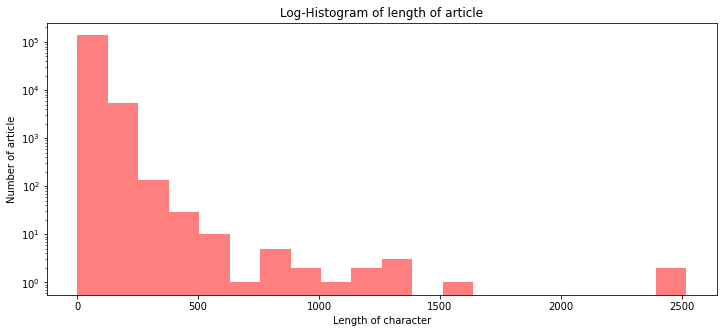

In [44]:
# 테스트 데이터 아티클 길이 분포 

# 히스토그램 
plt.figure(figsize = (12, 5))
plt.hist(test_len_df, bins = 20, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목 
plt.title('Log-Histogram of length of article')
plt.xlabel('Length of character')
plt.ylabel('Number of article')

plt.show()

In [45]:
# 1천자 이상 아티클 확인하기 
train_df.loc[train_len_df[train_len_df > 1000].index]["content"][2253]

'[이데일리 양희동 기자] 다음은 13일자 이데일리 신문 주요 뉴스다.1면-벤처투자 붐에도..M&A출구 꽉 막혔다-글로벌 증시 IT株독야 청청-비탄에 빠진 이란 시민 반미에서 반정부로-檢개혁 입법 마무리 수순..여야 총선모드 전환종합-[줌인]뛰는 은마 위에 나는 삼성전자-더 멀어진 지역균형발전 인구 절반 수도권에 밀집종합-M&A통합 벤처 투자금 회수 작년 고작 73억원..최근 5년새 최저-해외 M&A 적극 유치하고..민간자본 비중 늘려야-IPO만 고집하다가 낭패..상장 후 주가, 공모가 못 미치기 일쑤종합-中 국가 주도 경제 현계 와..기업 경쟁력 악화로 고도 성장 멈출 것-승자없는 무역전쟁..2년간 글로벌 경제성장률 3.02.4%종합-집안일은 AI가 척척, 출퇴근은 자율주행차로, 길 막히면 플라잉택시-CES혁신상 나만의 마스크팩 4월 출시..아모레퍼시픽 명동서 판매국제·경제-반중 차이잉원 대만 총통 연임..中 어떤 정세에도 독립 없다 경고-이번주 한미 방위비 분담금 6차 협상..트럼프 韓, 더 많이 내게 될 것압박-이란의 헛발질에 조용히 웃는 트럼프정치-이낙연, 종로냐 세종이냐..한국당 유승민보단 안철수-정세균 인준안 오늘 표결 가닥..무기명 투표가 변수-靑 윤석열 징계 논의한 적 없어-與 영입 7호 이용우 카뱅 대표..57억 스톡옵션 포기-강경화 내일 방미..호르무즈 파병 논의경제-전문가 만장일치 1월 기준금리 동결..70%는 -홍남기 부처 칸막이 허물고 중복사업 구조조정해야-이세돌 은퇴 부른 한국기원 정관..공정위 조사 착수금융-라임 사태에 여론 더 악화..DLF 사태 징계 수위에 영향 미치나-10일째 출근 못한 윤종원..오늘 노조 대토론회가 고비-치매 열공하는 일본 은행들도전2020-국산화 대전방지코팅제 극일소재 자리매김..이젠 中시장 이끈다-기술 자립 팔 걷어붙인 중기부산업&기업-2025년 100만대 판매..현대차 북미 가속페달-임원수 줄까 늘까..구현모 KT사장 첫 인사에 관심집중-LG듀얼스크린 신작 V60, 쿼드 카메라 전망-모든 사업 수익성 재검

In [46]:
# 트레인셋 단어 분포 
print('검색어길이 최댓값: {}'.format(np.max(train_len_df)))
print('검색어길이 최소값: {}'.format(np.min(train_len_df)))     
print('검색어길이 평균값: {}'.format(np.mean(train_len_df)))      
print('검색어길이 표준편차: {}'.format(np.std(train_len_df)))     
print('검색어길이 중간값: {}'.format(np.median(train_len_df)))      
# 사분위 
print('검색어길이 제 1사분위: {}'.format(np.percentile(train_len_df, 25)))
print('검색어길이 제 3사분위: {}'.format(np.percentile(train_len_df, 75)))      

검색어길이 최댓값: 3469
검색어길이 최소값: 2
검색어길이 평균값: 51.3268684997263
검색어길이 표준편차: 38.72098144668695
검색어길이 중간값: 39.0
검색어길이 제 1사분위: 29.0
검색어길이 제 3사분위: 64.0


In [47]:
# 테스트셋 단어 분포 
print('검색어길이 최댓값: {}'.format(np.max(test_len_df)))
print('검색어길이 최소값: {}'.format(np.min(test_len_df)))     
print('검색어길이 평균값: {}'.format(np.mean(test_len_df)))      
print('검색어길이 표준편차: {}'.format(np.std(test_len_df)))     
print('검색어길이 중간값: {}'.format(np.median(test_len_df)))      
# 사분위 
print('검색어길이 제 1사분위: {}'.format(np.percentile(test_len_df, 25)))
print('검색어길이 제 3사분위: {}'.format(np.percentile(test_len_df, 75)))      

검색어길이 최댓값: 2519
검색어길이 최소값: 1
검색어길이 평균값: 51.48567320169747
검색어길이 표준편차: 37.02903131253216
검색어길이 중간값: 39.0
검색어길이 제 1사분위: 29.0
검색어길이 제 3사분위: 65.0


In [48]:
#list(train_df.loc[train_len_df[train_len_df <3].index]["info"] == 1)

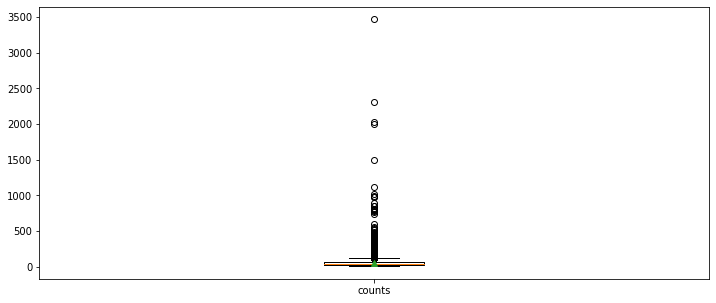

In [49]:
# 박스플롯 생성하기 : 트레인 데이터 
plt.figure(figsize = (12, 5))
plt.boxplot(train_len_df, 
            labels = ["counts"],
           showmeans = True)

plt.show()

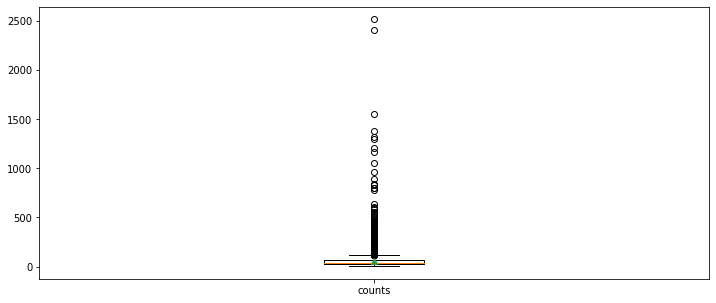

In [50]:
# 박스플롯 생성 : 테스트 데이터 
plt.figure(figsize = (12, 5))


plt.boxplot(test_len_df, 
            labels = ["counts"],
           showmeans = True)

plt.show()

In [66]:
# 박스 플롯 데이터를 보면 길이가 대부분 65개 이하로 평균 약 50개인데, 100개이상도 많이 분포해 있는 것을 확인할 수 있다.  
# 특히  1000개이상의 아웃라이어도 확인할 수 있다. 

In [51]:
train_df["len"] = train_len_df

길이가 200자 이상이면서 가짜 뉴스의 distplot 확인

In [52]:
idx_1000 = train_len_df[train_len_df > 200].index

In [53]:
train_df200 = train_df.loc[idx_1000]

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


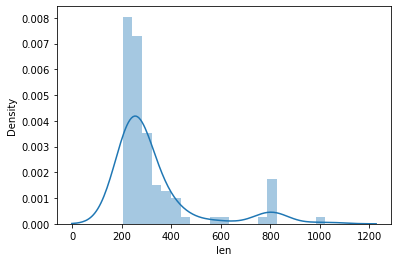

In [54]:
import seaborn as sns

sns.distplot(train_df200[train_df200["info"] == 1]["len"])
plt.show()

길이가 200자 이상이면서 진짜 뉴스의 distplot 확인

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


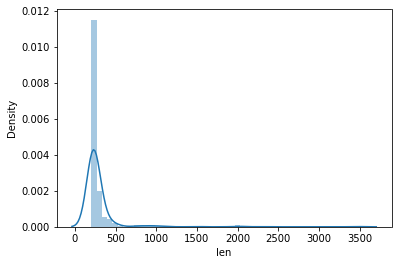

In [55]:
sns.distplot(train_df200[train_df200["info"] == 0]["len"])
plt.show()

### 단어단위 분석 

In [56]:
# 트레인셋 단어 단위로 분리 
train_word_counts = train_df["content"].apply(lambda x:len(x.split(' ')))

In [57]:
# 테스트셋 단어 단위로 분리 
test_word_counts = test_df["content"].apply(lambda x:len(x.split(' ')))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'Number of query')

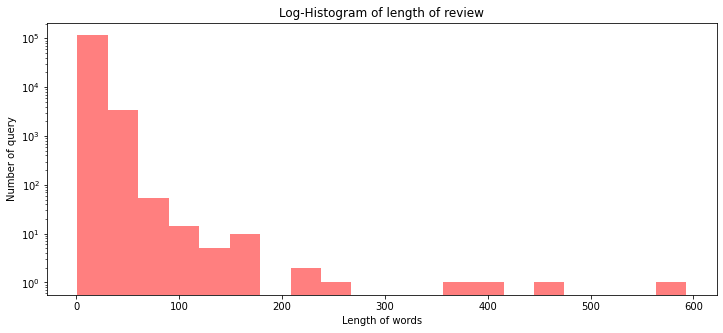

In [58]:
# 단어 개수 세기 

# 히스토그램 
plt.figure(figsize = (12, 5))
plt.hist(train_word_counts, bins = 20, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목 
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of words')
plt.ylabel('Number of query')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'Number of query')

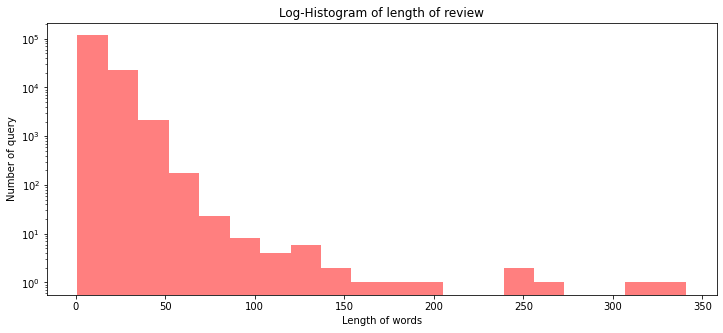

In [59]:
# 단어 개수 세기 

# 히스토그램 
plt.figure(figsize = (12, 5))
plt.hist(test_word_counts, bins = 20, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목 
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of words')
plt.ylabel('Number of query')

In [60]:
# 대부분의 단어가 200개 이하로 구성됨을 확인 

In [61]:
# 단어 평균 길이 1.68, 표준편차 0.9, 중간값 1, 최대값 29 

print('검색어 단어길이 최댓값: {}'.format(np.max(train_word_counts)))
print('검색어 단어길이 최소값: {}'.format(np.min(train_word_counts)))     
print('검색어 단어길이 평균값: {}'.format(np.mean(train_word_counts)))      
print('검색어 단어길이 표준편차: {}'.format(np.std(train_word_counts)))     
print('검색어 단어길이 중간값: {}'.format(np.median(train_word_counts)))      
# 사분위 
print('검색어 단어길이 제 1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('검색어 단어길이 제 3사분위: {}'.format(np.percentile(train_word_counts, 75)))      

검색어 단어길이 최댓값: 593
검색어 단어길이 최소값: 1
검색어 단어길이 평균값: 11.459219335550971
검색어 단어길이 표준편차: 8.31991947073168
검색어 단어길이 중간값: 9.0
검색어 단어길이 제 1사분위: 7.0
검색어 단어길이 제 3사분위: 14.0


In [62]:
# 단어 평균 길이 1.68, 표준편차 0.9, 중간값 1, 최대값 29 

print('검색어 단어길이 최댓값: {}'.format(np.max(test_word_counts)))
print('검색어 단어길이 최소값: {}'.format(np.min(test_word_counts)))     
print('검색어 단어길이 평균값: {}'.format(np.mean(test_word_counts)))      
print('검색어 단어길이 표준편차: {}'.format(np.std(test_word_counts)))     
print('검색어 단어길이 중간값: {}'.format(np.median(test_word_counts)))      
# 사분위 
print('검색어 단어길이 제 1사분위: {}'.format(np.percentile(test_word_counts, 25)))
print('검색어 단어길이 제 3사분위: {}'.format(np.percentile(test_word_counts, 75)))    

검색어 단어길이 최댓값: 341
검색어 단어길이 최소값: 1
검색어 단어길이 평균값: 11.477901308175218
검색어 단어길이 표준편차: 7.90477629157764
검색어 단어길이 중간값: 9.0
검색어 단어길이 제 1사분위: 7.0
검색어 단어길이 제 3사분위: 15.0


In [63]:
# 사전에 특수를 제외하였기 떄문에 물음표, 마침표 등은 0%인것을 볼 수 있음 
# ., ?, 숫자 등의 부호는 제외하지 않는 방법도 고려 가능 

qmarks = np.mean(train_df['content'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_df['content'].apply(lambda x: '.' in x)) # 마침표
numbers = np.mean(train_df['content'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 검색어: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 검색어: {:.2f}%'.format(fullstop * 100))
print('숫자가있는 검색어: {:.2f}%'.format(numbers * 100))

물음표가있는 검색어: 0.00%
마침표가 있는 검색어: 28.89%
숫자가있는 검색어: 56.81%


In [64]:
# 사전에 특수를 제외하였기 떄문에 물음표, 마침표 등은 0%인것을 볼 수 있음 
# ., ?, 숫자 등의 부호는 제외하지 않는 방법도 고려 가능 

qmarks = np.mean(test_df['content'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(test_df['content'].apply(lambda x: '.' in x)) # 마침표
numbers = np.mean(test_df['content'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 검색어: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 검색어: {:.2f}%'.format(fullstop * 100))
print('숫자가있는 검색어: {:.2f}%'.format(numbers * 100))

물음표가있는 검색어: 0.01%
마침표가 있는 검색어: 27.62%
숫자가있는 검색어: 56.00%


## 레이블 분포 

//anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


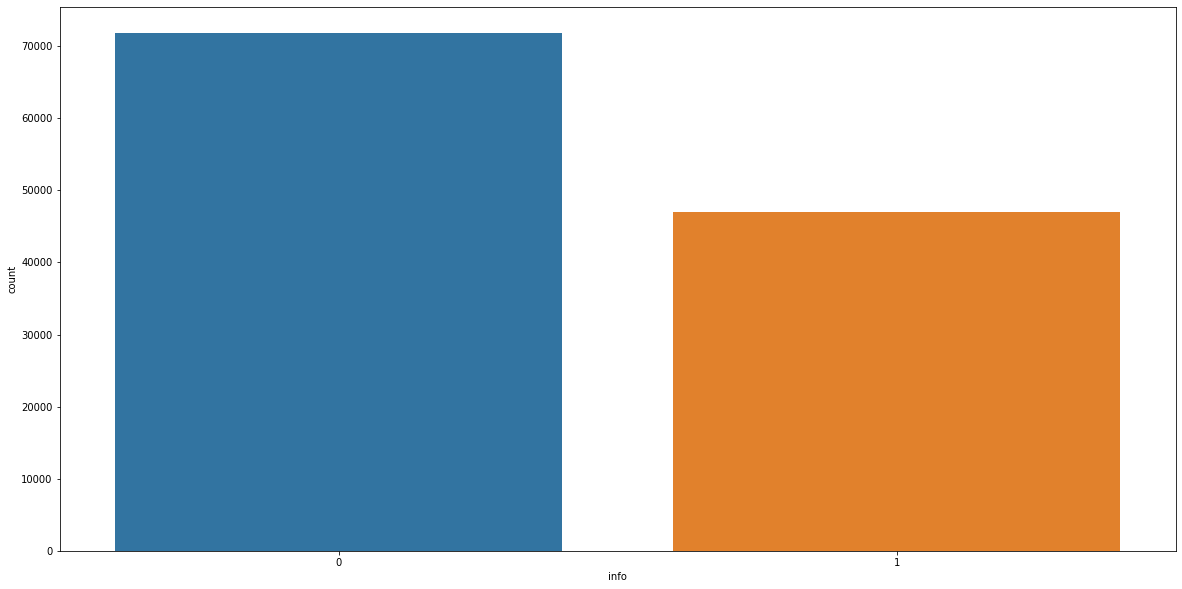

In [65]:
import seaborn as sns
plt.subplots(figsize = (20, 10))

sns.countplot(train_df["info"])
plt.show()

In [66]:
# 레이블 분포 
train_df["info"].value_counts() /len(train_df)

0    0.604767
1    0.395233
Name: info, dtype: float64

### 워드클라우드 시각화하기 

In [67]:
# 워드클라우드 
from wordcloud import WordCloud

In [68]:
fake = train_df[train_df["info"] == 1]
real = train_df[train_df["info"] == 0]

### 가짜뉴스 워드클라우드 

(-0.5, 799.5, 599.5, -0.5)

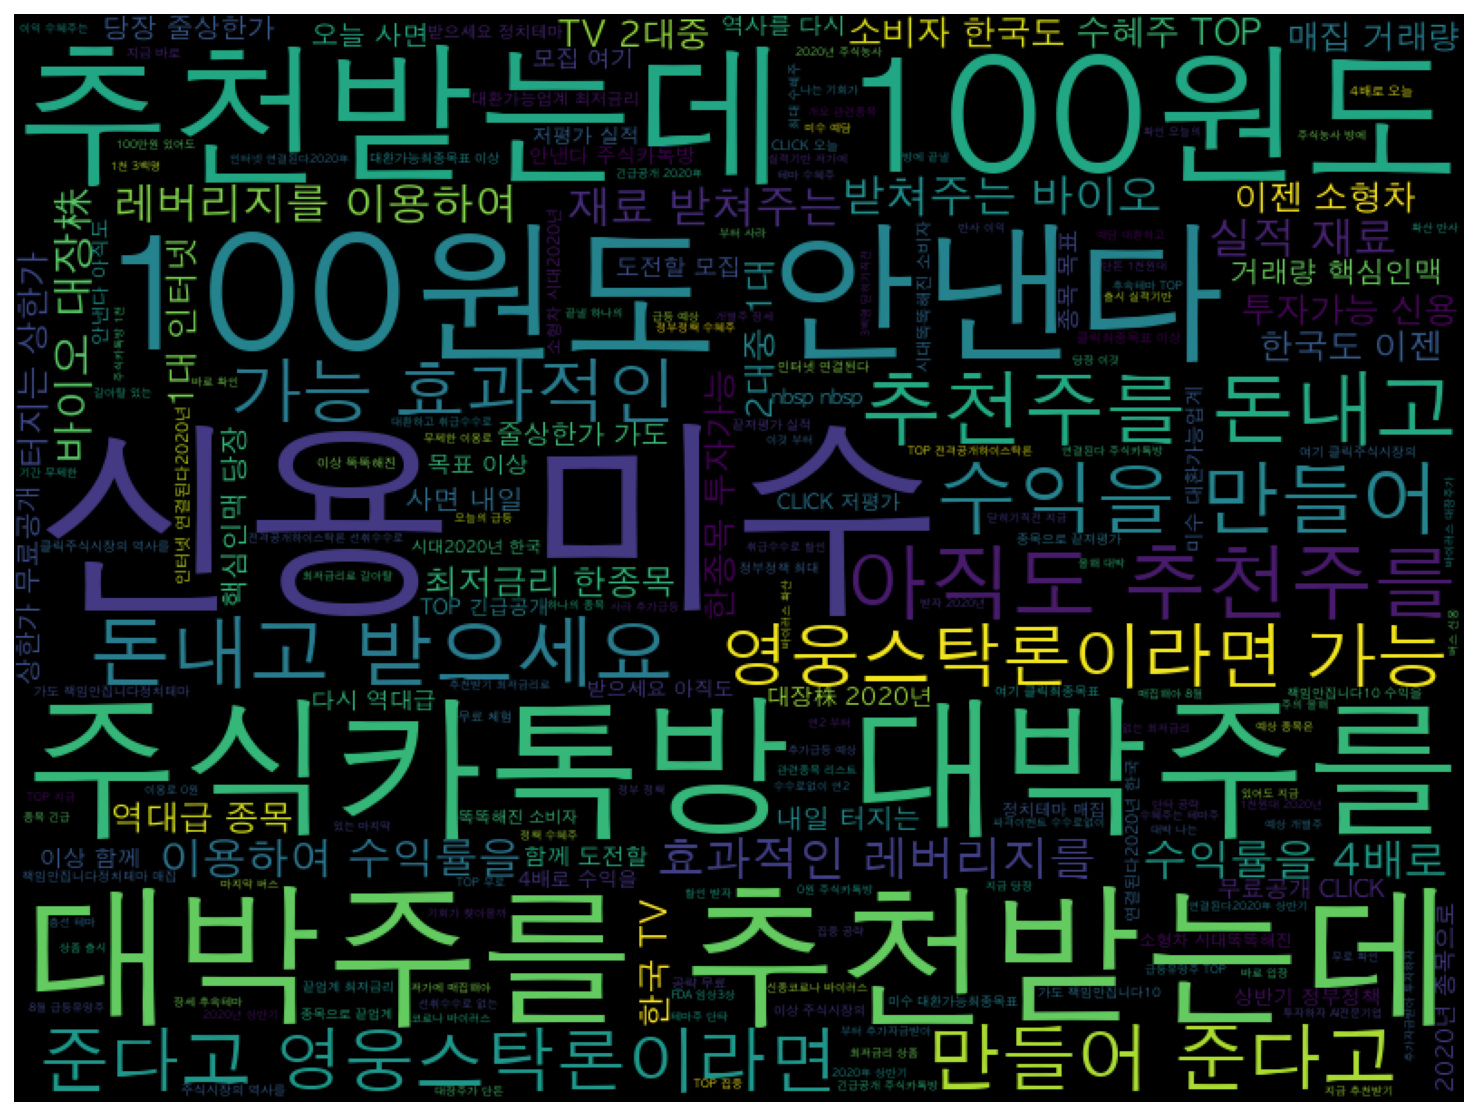

In [69]:
from matplotlib import rc
# rc('font', family="AppleGothic")
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# # 폰트조정 
matplotlib.rc("font", family = "AppleGothic")

# 해상도 
set_matplotlib_formats("retina")

# 워드클라우드 
cloud = WordCloud(width=800, height=600, font_path = "AppleGothic").generate("".join(fake['content']))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

### 진짜뉴스 워드클라우드 

(-0.5, 799.5, 599.5, -0.5)

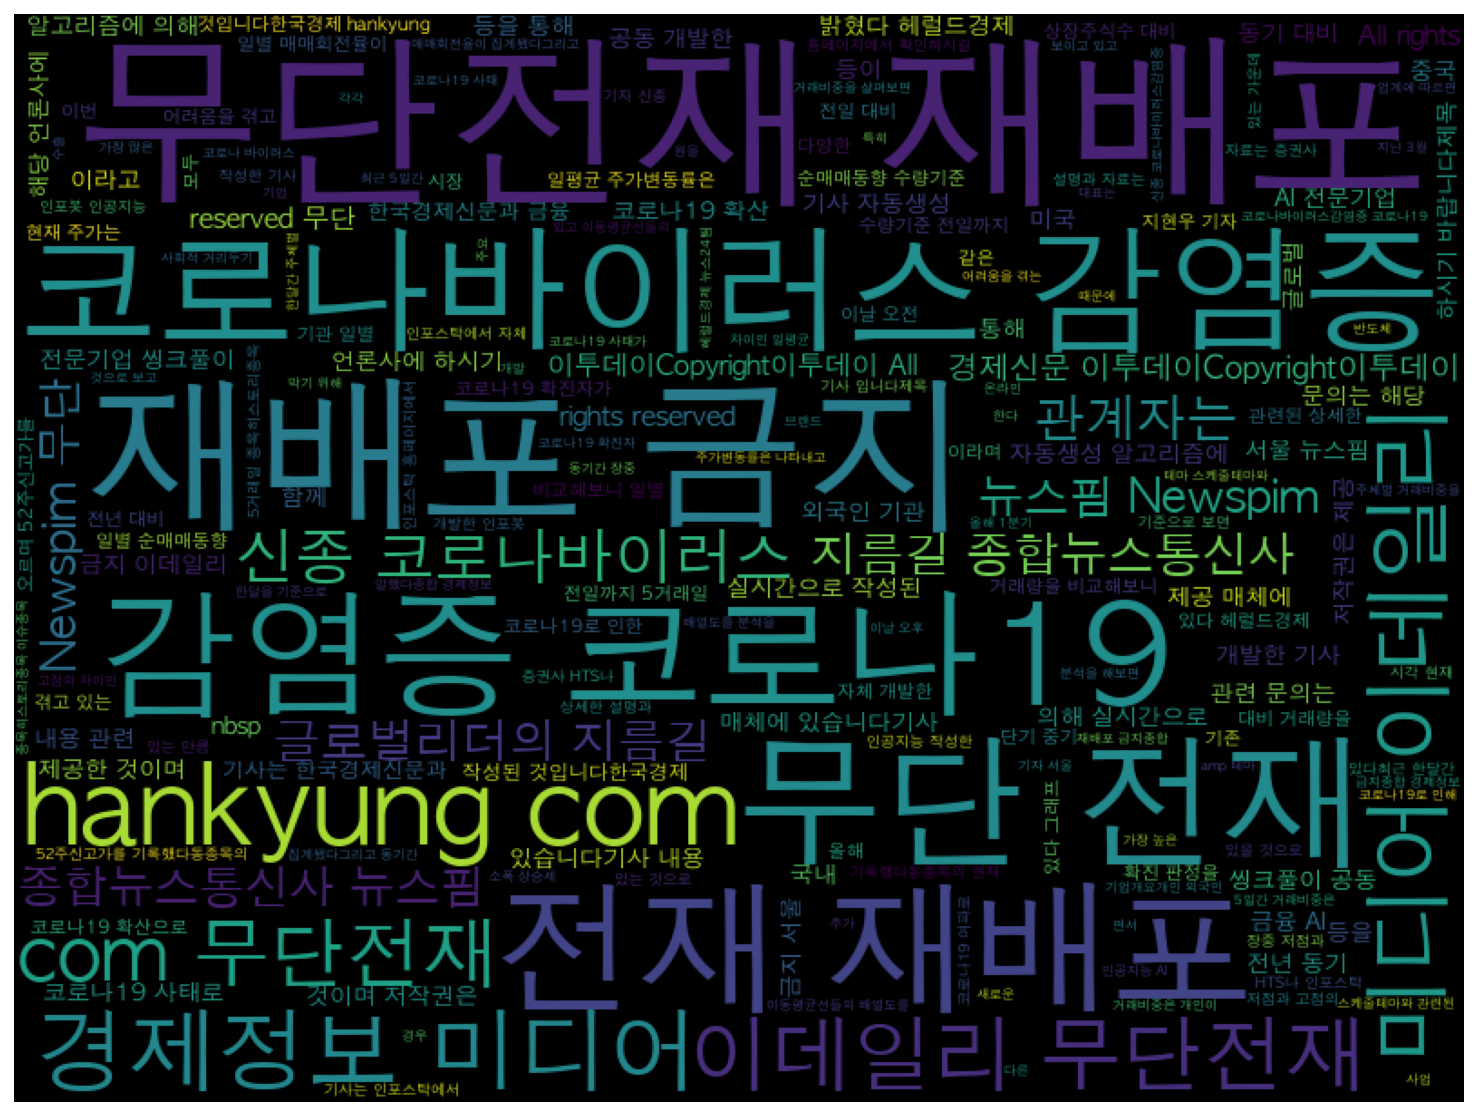

In [70]:
from matplotlib import rc
# rc('font', family="AppleGothic")
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# # 폰트조정 
matplotlib.rc("font", family = "AppleGothic")

# 해상도 
set_matplotlib_formats("retina")

# 워드클라우드 
cloud = WordCloud(width=800, height=600, font_path = "AppleGothic").generate("".join(real['content']))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

### 월별 가자뉴스/진짜뉴스 분포 살펴보기 

In [72]:
fake = train_df[train_df["info"] == 1]
real = train_df[train_df["info"] == 0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


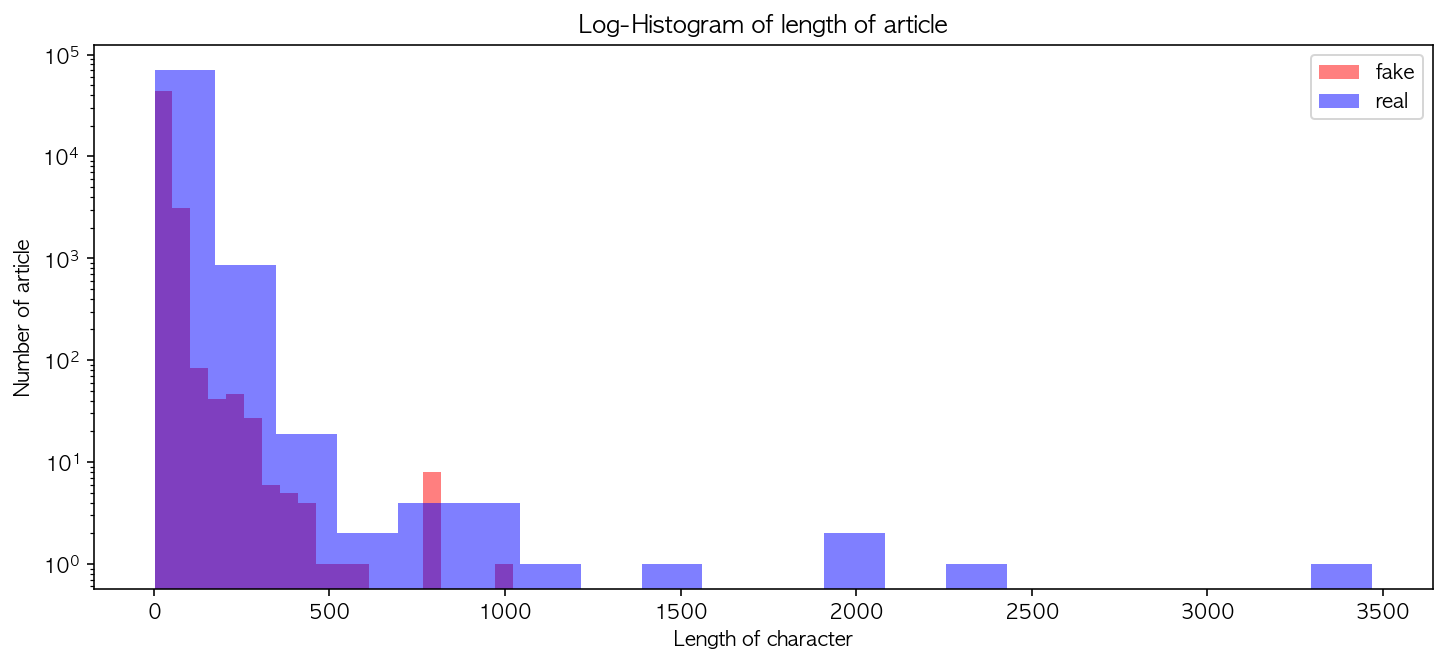

In [75]:
# 쿼리 길이 분포 

# 히스토그램 
plt.figure(figsize = (12, 5))
plt.hist(train_len_df, bins = 20, alpha = 0.5, color = 'r', label = "fake")
plt.hist(train_len_df1, bins = 20, alpha = 0.5, color = 'b', label = "real")
plt.yscale('log', nonposy = 'clip')

# 그래프 제목 
plt.title('Log-Histogram of length of article')
plt.xlabel('Length of character')
plt.ylabel('Number of article')
plt.legend()

plt.show()

In [76]:
# 날짜생성하기 
train_df["month"] = train_df["date"].apply(lambda x : str(x)[4:6])
train_df["day"] = train_df["date"].apply(lambda x : str(x)[6:8])

train_df["month"] = train_df["month"].astype(int)

train_df = train_df.sort_values(by = ["month", "day"])

train_df.groupby(["month"])["info"].mean()

test_df["month"] = test_df["date"].apply(lambda x : str(x)[4:6])
test_df["day"] = test_df["date"].apply(lambda x : str(x)[6:8])

test_df["month"] = test_df["month"].astype(int)

test_df = test_df.sort_values(by = ["month", "day"])

In [86]:
# 진짜뉴스/가짜뉴스 비율살펴보기 
train_df["info"].value_counts() / len(train_df)

0    0.604767
1    0.395233
Name: info, dtype: float64

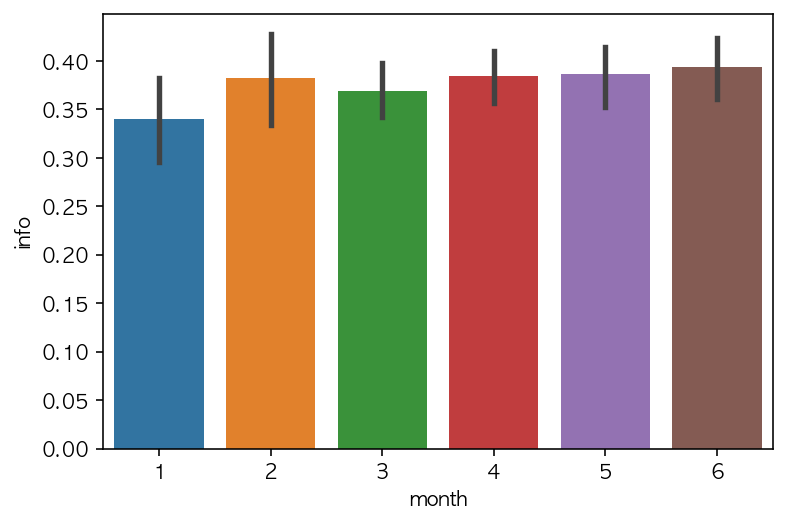

In [92]:
# 월별 가짜뉴스 비율 
day = train_df.groupby(["month", "day"])["info"].mean()
day = pd.DataFrame(day)
day = day.reset_index()

sns.barplot(data = day, y = "info", x = "month")
plt.show()

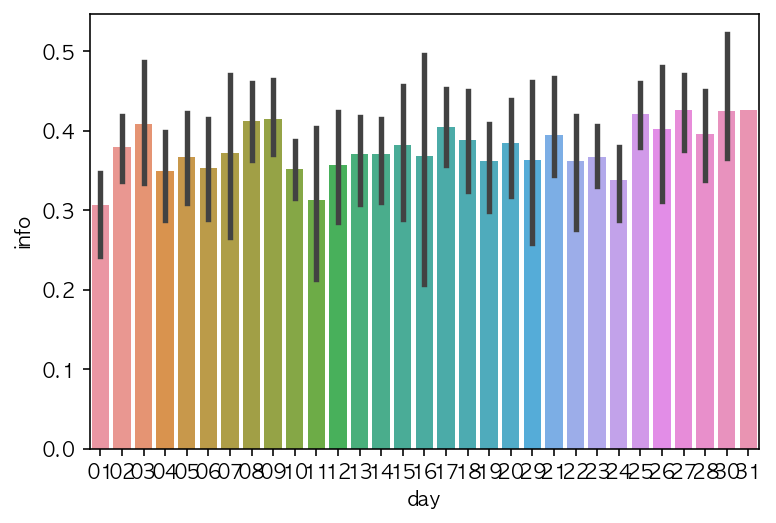

In [93]:
# 일별 가짜뉴스비율 
sns.barplot(data = day, y = "info", x = "day")
plt.show()

### LDA 분석 

In [98]:
from konlpy.tag import Okt, Hannanum, Kkma, Komoran  #, Mecab

han = Hannanum()
kkma = Kkma()
kom = Komoran()
#mecab = Mecab()
okt = Okt()

In [99]:
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(0, len(train_df))):
     train_df["content"][i] = list(kom.nouns(train_df["content"][i]))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [101]:
fake = train_df[train_df["info"] == 1]
real = train_df[train_df["info"] == 0]

In [102]:
tokenized_doc = fake["content"]
tokenized_doc1 = real["content"]

In [103]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(0, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [104]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.102*"집" + 0.101*"역대" + 0.097*"대박" + 0.095*"원"')
(1, '0.053*"수" + 0.042*"할인" + 0.041*"마지막" + 0.040*"신용"')
(2, '0.206*"후속" + 0.165*"파격" + 0.110*"기회" + 0.055*"명"')
(3, '0.202*"테마" + 0.164*"당장" + 0.131*"줄" + 0.130*"핵심"')
(4, '0.140*"무료" + 0.116*"주" + 0.092*"집중" + 0.089*"수혜"')
(5, '0.274*"예상" + 0.103*"셀트리온" + 0.059*"특허" + 0.050*"피"')
(6, '0.199*"종목" + 0.149*"급" + 0.144*"목표" + 0.139*"주식"')
(7, '0.093*"바이오" + 0.091*"분" + 0.090*"클릭" + 0.089*"평가"')
(8, '0.084*"년" + 0.077*"한국" + 0.067*"정부" + 0.067*"주"')
(9, '0.320*"도전" + 0.121*"수수료" + 0.063*"월" + 0.062*"출시"')
(10, '0.102*"차기" + 0.075*"펀드" + 0.070*"신문" + 0.068*"매니저"')
(11, '0.526*"급등" + 0.140*"연" + 0.127*"공개" + 0.016*"있다"')
(12, '0.148*"가능" + 0.096*"투자" + 0.076*"종목" + 0.075*"내일"')
(13, '0.189*"이제" + 0.187*"시대" + 0.186*"소비자" + 0.186*".한국"')
(14, '0.212*"오늘" + 0.188*"무료" + 0.176*"100%" + 0.168*"공개"')
(15, '0.312*"확인" + 0.109*"중국" + 0.070*"등" + 0.065*"주"')
(16, '0.143*"수익" + 0.140*"수익률" + 0.136*"효과" + 0.132*"이용"')
(17, '0.321*"주" + 0.312*"추천"

In [108]:
#pyLDAvis 패키지 설치
#pip install pyLDAvis

### 가짜뉴스 LDA 

In [107]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

//anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [109]:
from gensim import corpora
dictionary_ = corpora.Dictionary(tokenized_doc1)
corpus = [dictionary_.doc2bow(text) for text in tokenized_doc1]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(5, 2), (7, 2), (12, 1), (15, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [110]:
import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary_, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.130*"명" + 0.047*"중" + 0.036*"조사" + 0.034*"씨"')
(1, '0.112*"일" + 0.039*"대" + 0.028*"대표" + 0.021*"의원"')
(2, '0.038*"주택" + 0.034*"주" + 0.034*"간" + 0.033*"순"')
(3, '0.056*"제공" + 0.053*"서비스" + 0.040*"수" + 0.034*"고객"')
(4, '0.097*"수" + 0.065*"것" + 0.040*"말" + 0.027*"등"')
(5, '0.103*"경제" + 0.100*"기자" + 0.079*"일" + 0.056*"헤럴드"')
(6, '0.040*"기술" + 0.034*"등" + 0.031*"국내" + 0.026*"산업"')
(7, '0.079*"자" + 0.072*"금지" + 0.067*"배포" + 0.067*"무단"')
(8, '0.053*"등" + 0.045*"사업" + 0.040*"지원" + 0.026*"계획"')
(9, '0.050*"금융" + 0.041*"공동" + 0.034*"기사" + 0.032*"개발"')
(10, '0.038*"것" + 0.031*"시장" + 0.021*"세" + 0.019*"전망"')
(11, '0.068*"점" + 0.057*"투자" + 0.047*"시간" + 0.035*"번"')
(12, '0.068*"시" + 0.045*"일" + 0.041*"개" + 0.037*"만원"')
(13, '0.027*"공간" + 0.025*"의견" + 0.024*"바이오" + 0.021*"자료"')
(14, '0.167*"원" + 0.065*"거래" + 0.055*"기관" + 0.043*"일"')
(15, '0.044*"정부" + 0.031*"도시" + 0.027*"시민" + 0.026*"수"')
(16, '0.046*"관련" + 0.030*"것" + 0.029*"내용" + 0.025*"해당"')
(17, '0.116*"년" + 0.042*"원" + 0.039*"대비" + 0.036*

### 진짜뉴스 LDA 

In [111]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary_)
pyLDAvis.display(vis)

//anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
//anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


## 전처리 

### 형태소 분석(Soynlp) 

In [114]:
train_df["content"]

8703      [미세먼지, 정책, 동향, 한눈, 환경부, 주간, 소식지, 발간, 서울, 연합뉴스,...
8704      [소식지, 국내, 미세먼지, 정책, 동향, 중, 협력, 추진, 사항, 중국, 미세먼...
8705      [호, 소식지, 조기, 폐차, 보조금, 지급, 차등, 사업장, 대기, 오염, 물질,...
8825      [법원, 선거, 개입, 의혹, 송, 병기, 영장, 기각, 검찰, 납득, 종합, 법원...
8826      [송, 부시장, 김기현, 울산, 시장, 측근, 비리, 의혹, 청와대, 최초, 제보,...
                                ...                        
115896                      [주식, 시장, 역사, 역대, 급, 종목, 목표, 이상]
115897                              [소비자, .한국, 이제, 소형차, 시대]
115898                              [소비자, .한국, 이제, 소형차, 시대]
115899                              [년, 한국, 대중, 대, 인터넷, 연결]
115900                              [년, 한국, 대중, 대, 인터넷, 연결]
Name: content, Length: 118745, dtype: object

In [115]:
# corpus = list(train_df["content"]) 

# word_extractor = WordExtractor()
# word_extractor.train(corpus)
# word_score_table = word_extractor.extract()

# from soynlp.tokenizer import MaxScoreTokenizer
# scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
# maxscore_tokenizer = MaxScoreTokenizer(scores=scores)

# train_df["content"] = train_df["content"].apply(lambda x : maxscore_tokenizer.tokenize(x))
# test_df["content"] = test_df["content"].apply(lambda x : maxscore_tokenizer.tokenize(x))

# pd.DataFrame(train_df["content"])

In [116]:
from keras.preprocessing.text import Tokenizer
import re

tk = Tokenizer()
tk = Tokenizer(filters = "!#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n, '")

In [117]:
tk.fit_on_texts(list(train_df["content"]) + list(test_df["content"]))

In [118]:
train_df["content"]

8703      [미세먼지, 정책, 동향, 한눈, 환경부, 주간, 소식지, 발간, 서울, 연합뉴스,...
8704      [소식지, 국내, 미세먼지, 정책, 동향, 중, 협력, 추진, 사항, 중국, 미세먼...
8705      [호, 소식지, 조기, 폐차, 보조금, 지급, 차등, 사업장, 대기, 오염, 물질,...
8825      [법원, 선거, 개입, 의혹, 송, 병기, 영장, 기각, 검찰, 납득, 종합, 법원...
8826      [송, 부시장, 김기현, 울산, 시장, 측근, 비리, 의혹, 청와대, 최초, 제보,...
                                ...                        
115896                      [주식, 시장, 역사, 역대, 급, 종목, 목표, 이상]
115897                              [소비자, .한국, 이제, 소형차, 시대]
115898                              [소비자, .한국, 이제, 소형차, 시대]
115899                              [년, 한국, 대중, 대, 인터넷, 연결]
115900                              [년, 한국, 대중, 대, 인터넷, 연결]
Name: content, Length: 118745, dtype: object

### 정수인코딩 

In [119]:
train_text = tk.texts_to_sequences(train_df["content"]) 
test_text = tk.texts_to_sequences(test_df["content"]) 

In [120]:
# 정답 레이블값
y = train_df["info"]

### 패딩 

In [121]:
# 150개에서 자르도록 하자 

from keras.preprocessing.sequence import pad_sequences

max_len = 40

padded_train = pad_sequences(train_text, maxlen = max_len, truncating  = "pre")
padded_test = pad_sequences(test_text, maxlen = max_len, truncating  = "pre") #단어들이 짤리지 않도록 늘려준다 # maxlen을 줄이면 처리 속도가 증가 # 


#padded_train = pad_sequences(train_text, maxlen = 300, truncating = "pre" or "post") # 디폴트 = pre 

In [122]:
padded_train

array([[   0,    0,    0, ..., 2766, 2826,    1],
       [   0,    0,    0, ...,    2, 6212,  434],
       [   0,    0,    0, ..., 1113,   46,  911],
       ...,
       [   0,    0,    0, ...,   82,   94,   68],
       [   0,    0,    0, ...,   21,   70,   64],
       [   0,    0,    0, ...,   21,   70,   64]], dtype=int32)

### 예측모델1: 로지스틱 회귀모형 

In [123]:
train_df["content"]

8703      [미세먼지, 정책, 동향, 한눈, 환경부, 주간, 소식지, 발간, 서울, 연합뉴스,...
8704      [소식지, 국내, 미세먼지, 정책, 동향, 중, 협력, 추진, 사항, 중국, 미세먼...
8705      [호, 소식지, 조기, 폐차, 보조금, 지급, 차등, 사업장, 대기, 오염, 물질,...
8825      [법원, 선거, 개입, 의혹, 송, 병기, 영장, 기각, 검찰, 납득, 종합, 법원...
8826      [송, 부시장, 김기현, 울산, 시장, 측근, 비리, 의혹, 청와대, 최초, 제보,...
                                ...                        
115896                      [주식, 시장, 역사, 역대, 급, 종목, 목표, 이상]
115897                              [소비자, .한국, 이제, 소형차, 시대]
115898                              [소비자, .한국, 이제, 소형차, 시대]
115899                              [년, 한국, 대중, 대, 인터넷, 연결]
115900                              [년, 한국, 대중, 대, 인터넷, 연결]
Name: content, Length: 118745, dtype: object

In [124]:
train_df = pd.read_csv("news_train.csv")
test_df = pd.read_csv("news_test.csv")

content = []
for i, k in zip(train_df["title"], train_df["content"]):
    content.append(str(i) + str(k))

train_df["content"] = content

content = []
for i, k in zip(test_df["title"], test_df["content"]):
    content.append(str(i) + str(k))

test_df["content"] = content

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0,
                             analyzer="char",
                             sublinear_tf=True,
                             ngram_range=(1, 3),
                             max_features=5000)

X = vectorizer.fit_transform(train_df["content"])

from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(train_df["info"])

X_train, X_eval, y_train, y_eval = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SPLIT,
                                                    random_state=RANDOM_SEED)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = "char", sublinear_tf = True, 
                            ngram_range = (1,3), max_features = 5000)



X = vectorizer.fit_transform(train_df["content"])

#### 학습& 검증 데이터셋 분리 

In [126]:
from sklearn.model_selection import train_test_split 
import numpy as np 

RANDOM_SEED = 42 
TEST_SPLIT = 0.2 

y = np.array(train_df["info"])

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

#### 모델 선언 및 학습 

In [127]:
from sklearn.linear_model import LogisticRegression 

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
//anaconda3/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
//anaconda3/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
//anaconda3/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
//anaconda3/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
//anaconda3/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tos

LogisticRegression(class_weight='balanced')

In [128]:
lgs.score(X_train, y_train)

0.983862478420144

In [129]:
### 검증데이터로 성능평가 

print(f"Accuracy:{lgs.score(X_eval, y_eval)}")
    # 검증데이터로 성능측정 

Accuracy:0.9803781211840499


### 2. 예측모델 LGBM

In [130]:
from lightgbm import LGBMClassifier

In [131]:
lgb = LGBMClassifier(num_leaves = 150, learning_rate= 0.1, n_estimators= 300)

In [132]:
lgb.fit(X_train, y_train)

LGBMClassifier(n_estimators=300, num_leaves=150)

In [133]:
print(f"Accuracy:{lgb.score(X_eval, y_eval)}")
    # 검증데이터로 성능측정 

Accuracy:0.9915364857467683


In [135]:
lgb.score(X_train, y_train)

0.9999894732409785

### 예측모델3: 랜덤포레스트

In [136]:
from sklearn.ensemble import RandomForestClassifier


# 랜덤 포레스트 분류기에  100개 의사 결정 트리를 사용한다.
forest = RandomForestClassifier(n_estimators = 300, max_depth= 150) 

# 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습을 시작한다.
forest.fit(X_train, y_train)

#train_data_features

print("Accuracy: %f" % forest.score(X_eval, y_eval))  # 검증함수로 정확도 측정

Accuracy: 0.984294


In [137]:
forest.score(X_train, y_train)

0.9999894732409785

In [138]:
forest.score(X_eval, y_eval)

0.9842940755400227

## 딥러닝 

전처리에 따라 결과가 다소 상이할 수 있습니다. 

In [139]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.sequence import pad_sequences 


# 데이터 불러오기 
train_df = pd.read_csv("news_train.csv")
test_df = pd.read_csv("news_test.csv")

In [140]:
content = []
for i, k in zip(train_df["title"], train_df["content"]):
    content.append(str(i) + str(k))
    
train_df["content"] = content

In [141]:
content = []
for i, k in zip(test_df["title"], test_df["content"]):
    content.append(str(i) + str(k))
    
test_df["content"] = content

In [142]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [143]:
corpus = list(train_df["content"]) 

In [144]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.218 Gbse memory 1.206 Gb
all cohesion probabilities was computed. # words = 154305
all branching entropies was computed # words = 291780
all accessor variety was computed # words = 291780


In [145]:
from soynlp.tokenizer import MaxScoreTokenizer
scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
maxscore_tokenizer = MaxScoreTokenizer(scores=scores)

In [146]:
train_df["content"] = train_df["content"].apply(lambda x : maxscore_tokenizer.tokenize(x))
test_df["content"] = test_df["content"].apply(lambda x : maxscore_tokenizer.tokenize(x))

In [147]:
from keras.preprocessing.text import Tokenizer
import re

tk = Tokenizer()
tk = Tokenizer(filters = "!#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n, '")

In [148]:
tk.fit_on_texts(list(train_df["content"]) + list(test_df["content"]))

In [149]:
train_text = tk.texts_to_sequences(train_df["content"]) 
test_text = tk.texts_to_sequences(test_df["content"]) 

In [150]:
# 정답 레이블값
y = train_df["info"]

In [151]:


from keras.preprocessing.sequence import pad_sequences

max_len = 40

padded_train = pad_sequences(train_text, maxlen = max_len, truncating  = "pre")
padded_test = pad_sequences(test_text, maxlen = max_len, truncating  = "pre") #단어들이 짤리지 않도록 늘려준다 # maxlen을 줄이면 처리 속도가 증가 # 


In [152]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(padded_train, y, test_size = 0.2, random_state = 42, stratify = y)


In [153]:
from keras import Sequential
from keras.layers import Dense, Embedding, Flatten, LSTM, Bidirectional, Dropout, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D, GRU
from keras.optimizers import Adam 

model = Sequential()

model.add(Embedding(len(tk.word_index)+1, 30, input_length = max_len)) 
model.add(Flatten())
model.add(Dense(2, activation = "softmax"))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"]) 

from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(patience = 5)
mc = ModelCheckpoint("best2.h5", save_best_only = True)
model.fit(x_train, y_train, batch_size = 128, epochs = 20, 
callbacks = [es, mc], validation_data=(x_valid, y_valid))

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Epoch 1/20


//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - ETA: 0s - loss: 0.1169 - acc: 0.9597

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 35s 48ms/step - loss: 0.1169 - acc: 0.9597 - val_loss: 0.0349 - val_acc: 0.9870
Epoch 2/20
743/743 [==============================] - ETA: 0s - loss: 0.0130 - acc: 0.9971

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 34s 46ms/step - loss: 0.0130 - acc: 0.9971 - val_loss: 0.0247 - val_acc: 0.9901
Epoch 3/20
742/743 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9997

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 44s 60ms/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.0227 - val_acc: 0.9910
Epoch 4/20
743/743 [==============================] - ETA: 0s - loss: 0.0011 - acc: 0.9999

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 44s 59ms/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0221 - val_acc: 0.9906
Epoch 5/20
743/743 [==============================] - ETA: 0s - loss: 4.8233e-04 - acc: 1.0000

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 41s 55ms/step - loss: 4.8233e-04 - acc: 1.0000 - val_loss: 0.0222 - val_acc: 0.9910
Epoch 6/20
742/743 [============================>.] - ETA: 0s - loss: 2.7901e-04 - acc: 1.0000

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 38s 51ms/step - loss: 2.7897e-04 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 0.9909
Epoch 7/20
743/743 [==============================] - ETA: 0s - loss: 2.1855e-04 - acc: 1.0000

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 36s 49ms/step - loss: 2.1855e-04 - acc: 1.0000 - val_loss: 0.0226 - val_acc: 0.9909
Epoch 8/20
743/743 [==============================] - ETA: 0s - loss: 1.2157e-04 - acc: 1.0000

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 37s 50ms/step - loss: 1.2157e-04 - acc: 1.0000 - val_loss: 0.0229 - val_acc: 0.9908
Epoch 9/20
743/743 [==============================] - ETA: 0s - loss: 1.4816e-04 - acc: 1.0000

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


743/743 [==============================] - 35s 47ms/step - loss: 1.4816e-04 - acc: 1.0000 - val_loss: 0.0247 - val_acc: 0.9905


### LSTM

In [154]:
from keras import Sequential
from keras.layers import Dense, Embedding, Flatten, LSTM, Bidirectional, Dropout, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, SpatialDropout1D, GRU
from keras.optimizers import Adam 

model = Sequential()
model.add(Embedding(len(tk.word_index)+1, 32, input_length = max_len)) 
model.add(LSTM(30, return_sequences = True))
model.add(Flatten()) 
model.add(Dense(2, activation = "softmax"))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"]) 

from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(patience = 3) 
mc = ModelCheckpoint("best2.h5", save_best_only = True)
model.fit(x_train, y_train, batch_size = 256, epochs = 20, 
callbacks = [es, mc], validation_data=(x_valid, y_valid))


//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_pr

Epoch 1/20


//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_pr

372/372 [==============================] - ETA: 0s - loss: 0.1397 - acc: 0.9384

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_pr

372/372 [==============================] - 51s 136ms/step - loss: 0.1397 - acc: 0.9384 - val_loss: 0.0476 - val_acc: 0.9839
Epoch 2/20
372/372 [==============================] - ETA: 0s - loss: 0.0185 - acc: 0.9943

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


372/372 [==============================] - 49s 131ms/step - loss: 0.0185 - acc: 0.9943 - val_loss: 0.0371 - val_acc: 0.9868
Epoch 3/20
372/372 [==============================] - ETA: 0s - loss: 0.0050 - acc: 0.9987

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


372/372 [==============================] - 47s 127ms/step - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0430 - val_acc: 0.9870
Epoch 4/20
372/372 [==============================] - ETA: 0s - loss: 0.0019 - acc: 0.9995

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


372/372 [==============================] - 50s 136ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0451 - val_acc: 0.9876
Epoch 5/20
372/372 [==============================] - ETA: 0s - loss: 0.0010 - acc: 0.9998

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


372/372 [==============================] - 55s 148ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.0498 - val_acc: 0.9869


### 끝